# Neural Network from Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate some Data

In [2]:
N = 10000
upper = 3
lower = 0
x = np.linspace(lower, upper, N)
x = x.reshape(-1,1)

In [3]:
# y = (120*np.sin(x)+270*np.sin(x-35) + 50*np.sin(x))
y = np.sin(x)

/tmp/ipykernel_3149847/3873877298.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


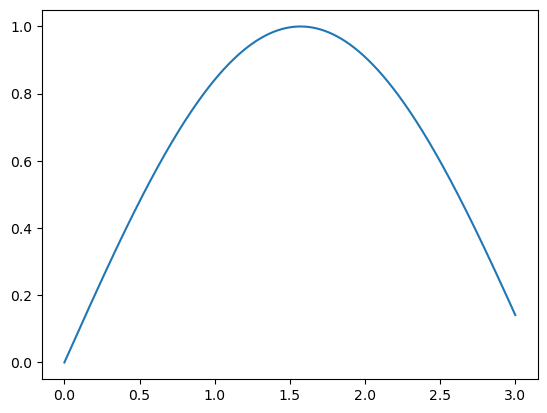

In [4]:
f = plt.figure()
plt.plot(x,y)
f.show()

## Define a Network

See p. 210 and 239 of Neural Networks from scratch.

In [5]:
class Dense:
    def __init__(self, inputs, neurons):
        self.weights = np.ones((inputs, neurons)) *  0.01 # * np.random.randn(inputs, neurons)
        self.biases = np.zeros((1, neurons))
    def forward(self,inputs):
        self.inputs = inputs # store the inputs to calculage gradient next time
        self.output=np.dot(inputs, self.weights) + self.biases
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues) # d/dw(w.x) = x^t Derivative of weights is inputs, multiply this by pre-existing derivative
        self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
        
        # Gradient on values (d/dx)
        self.dinputs = np.dot(dvalues, self.weights.T) # d/dx(w.x) = w^t
        

In [6]:
class ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        self.inputs = inputs # Store the inputs for backprop
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        # The original variable needs to be modified, so make a copy of it first
        self.dinputs = dvalues.copy()
        
        # Gradient is zero where input values were negative
        self.dinputs[self.inputs <= 0] = 0

In [7]:
# Common class for loss
class Loss:
    # Calculates the loss function given observations and prediction
    def calculate(self, output, y):
        
        # Calculate the losses for everything given
        sample_losses = self.forward(output, y)
        
        # Average it
        data_loss = np.mean(sample_losses)
        
        return data_loss

In [8]:
class Loss_SE(Loss):
    
    # Forward Pass
    # Leave Mean and Root to Parent class
    def forward(self, y_pred, y_true):
        return (y_pred-y_true)**2
        
    def backward(self, dvalues, y_pred, y_true):
        self.dinputs = 2*(y_pred-y_true)*dvalues
    

In [9]:
class Optimizer_SGD:
    # Initialize
    def __init__(self, learning_rate=1e-6):
        self.learning_rate = learning_rate
    # Update the parameters
    def update_params(self, layer):
        layer.weights -= self.learning_rate * layer.dweights
        layer.biases -= self.learning_rate * layer.dbiases

## Preview the Network

In [10]:
class NN:
    def __init__(self, insize, h1, outsize, lr=1e-6):
        self.d1   = Dense(insize, h1)
        self.act1 = ReLU()
        self.d2   = Dense(h1, outsize)
        self.act2 = ReLU()
        self.l = Loss_SE()
        self.optimizer = Optimizer_SGD(lr)
    def forward(self, x):
        self.d1.forward(x)
        self.act1.forward(self.d1.output)
        self.d2.forward(self.act1.output)
        self.act2.forward(self.d2.output)
        return self.act2.output
    def loss(self, y, yhat):
        self.lossval = self.l.calculate(yhat, y)
        self.l.backward(self.lossval, yhat, y)   # The output is the derivative values for the loss
        return self.lossval
    def backward(self, y):
        # For the backward pass we pass along dinput d/dx, this is used as dvalues to calulate d/dw (dweights)
        self.act2.backward(self.l.dinputs)   # d/dw
        self.d2.backward(self.act2.dinputs)
        self.act1.backward(self.d2.dinputs)
        self.d1.backward(self.act1.dinputs)  
    def opt(self):
        self.optimizer.update_params(self.d1)
        self.optimizer.update_params(self.d2)
        
    

In [11]:
net = NN(1, 20, 1, 1e-6)
yhat = net.forward(x)

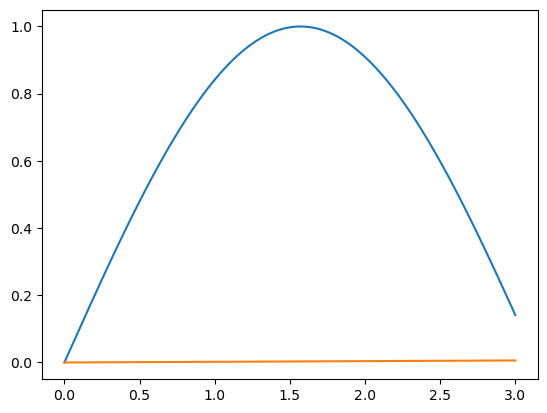

In [12]:
plt.plot(x, y)
plt.plot(x, yhat)

In [13]:
losses = []
for epoch in range(1000):
    yhat = net.forward(x)
    losses.append(net.loss(y, yhat))
    net.backward(y)
    net.opt()
    

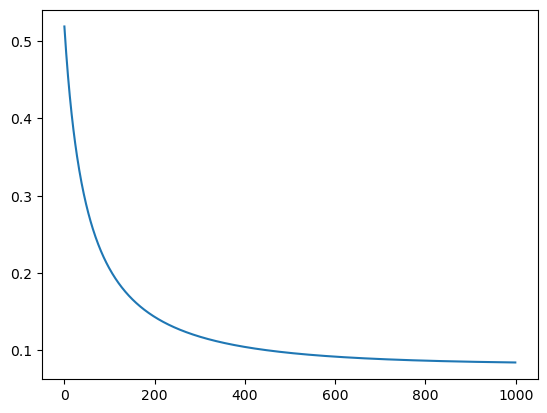

In [14]:
plt.plot(losses)

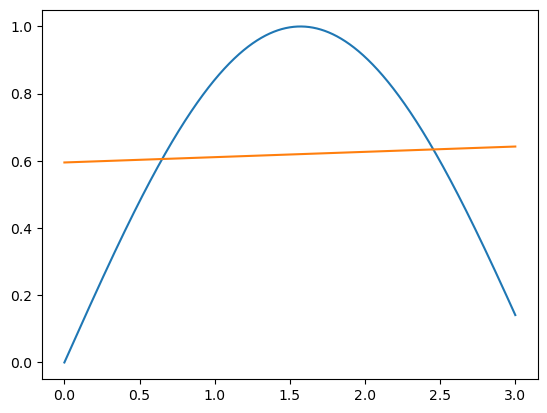

In [15]:
plt.plot(x, y)
plt.plot(x, yhat)